# Preprocessing for Modelling

This notebook prepares the cleaned merged dataset for model training.

**Steps:**
1. Loading the cleaned dataset
2. Encoding categorical variables
3. Scaling numeric features
4. Handling class imbalance
5. Splitting into training and test sets

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Load Cleaned Data

In [2]:
data = pd.read_csv("../data/merged_clean.csv")
print("Loaded dataset:", data.shape)
print(data['label'].value_counts(normalize=True))

Loaded dataset: (36457, 23)
label
0    0.983103
1    0.016897
Name: proportion, dtype: float64


## Encode Categorical Features

In [3]:
data

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,YEARS_EMPLOYED,max_delay,avg_delay,num_bad_months,months_total,label
0,5008804,M,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,0,Unknown,2,32,12.443836,1,0.000000,0,16,0
1,5008805,M,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,0,Unknown,2,32,12.443836,1,0.000000,0,15,0
2,5008806,M,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,0,Security staff,2,58,3.106849,0,-0.533333,0,30,0
3,5008808,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,Sales staff,1,52,8.358904,0,-0.600000,0,5,0
4,5008809,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,Sales staff,1,52,8.358904,-1,-1.000000,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,M,1,1,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,...,0,Managers,2,47,6.630137,5,0.916667,4,12,1
36453,5149834,F,0,1,0,157500.0,Commercial associate,Higher education,Married,House / apartment,...,1,Medicine staff,2,33,3.630137,5,2.208333,11,24,1
36454,5149838,F,0,1,0,157500.0,Pensioner,Higher education,Married,House / apartment,...,1,Medicine staff,2,33,3.630137,5,1.606061,11,33,1
36455,5150049,F,0,1,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,...,0,Sales staff,2,49,1.794521,2,0.300000,1,10,1


In [4]:
categorical_cols = [
    'CODE_GENDER',
    'NAME_INCOME_TYPE',
    'NAME_EDUCATION_TYPE',
    'NAME_FAMILY_STATUS',
    'NAME_HOUSING_TYPE',
    'OCCUPATION_TYPE'
]

data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)
print("Encoded dataset shape:", data.shape)

Encoded dataset shape: (36457, 53)


## Scale Numeric Factors

In [5]:
from sklearn.preprocessing import StandardScaler

num_cols = [
    'AGE', 'YEARS_EMPLOYED', 'AMT_INCOME_TOTAL', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS',
    'max_delay', 'avg_delay', 'num_bad_months', 'months_total'
]

scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

## Train-Test Split

In [6]:
X = data.drop(columns=['label', 'ID'])
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("Positive class ratio in training:", y_train.mean())

Training set shape: (29165, 51)
Test set shape: (7292, 51)
Positive class ratio in training: 0.01690382307560432


## Handle Class Imbalance

In [7]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42, sampling_strategy='auto')
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Before SMOTE:")
print(y_train.value_counts())
print("After SMOTE:")
print(y_train_resampled.value_counts())


Before SMOTE:
label
0    28672
1      493
Name: count, dtype: int64
After SMOTE:
label
0    28672
1    28672
Name: count, dtype: int64


## Save Processed Data

In [8]:
X_train.to_csv("../data/X_train.csv", index=False)
X_test.to_csv("../data/X_test.csv", index=False)
y_train.to_csv("../data/y_train.csv", index=False)
y_test.to_csv("../data/y_test.csv", index=False)

X_train_resampled.to_csv("../data/X_train_smote.csv", index=False)
y_train_resampled.to_csv("../data/y_train_smote.csv", index=False)

## Quick Visual Check for Imbalance

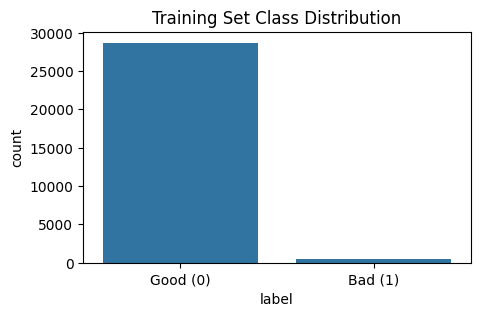

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,3))
sns.countplot(x=y_train)
plt.title("Training Set Class Distribution")
plt.xticks(ticks=[0,1], labels=["Good (0)", "Bad (1)"])
plt.show()